The Kuramoto Model is a mathematical model used to describe the synchronization of a large set of coupled oscillators. This formulation, which was motivated by the behaviour of both physical and biological oscilators, has found widespread application in neuroscience.

The model makes several assumptions, including that there is weak coupling, that the oscillators are identical or nearly identical, and that interactions depend sinusoidally on the phase difference between each pair of objects. 

For the exercises, we need to simulate some kuramoto oscilators coupled using an external forcing: for one of the systems, this external forcing will be the average phase of all the oscilators, while, for the other, we will be using a uniform distribution between 0 and $2 \cdot \pi$. Thus:

In [1]:
import numpy as np                   #Supports common numeric operations
from numpy import random             #To create sets of random numbers
import matplotlib.pyplot as plt      #For graphs
from colour import Color             #Make color gradients in a programmatic way
import seaborn as sns                #Statistical data visualization
import pandas as pd                  #Data Visualization library
from matplotlib import animation, rc #Make anymations
from IPython.display import HTML     #Convert to HTML (display animations)

In [2]:
#A function to calculate θ(t)
def get_new_theta(theta,omega,K,dt, method):
    new_theta = np.copy(theta); oscilators_diff = []
    dtheta = np.zeros(len(theta))
    psi = np.arctan2(sum(np.sin(theta)), sum(np.cos(theta)))%(2*np.pi)  #Average phase
    forcing = random.uniform(0, 2*np.pi) #Uniform dist between 0 and 2*pi
    #Putting it here makes r calculated with starting values but not ending values
    r = (1/len(theta))*np.sqrt(sum(np.sin(theta))**2+sum(np.cos(theta))**2) 
    for j in range(1,len(theta)): #for each pair of oscilators
        if method == "average":
            dtheta += K*np.sin(psi - theta) #Adding to whole arrays is easier
        elif method == "random":
            dtheta += K*np.sin(forcing - theta) 
        elif method == "oscilators":
            shift_theta = np.roll(theta,j)  # periodic boundary
            dtheta += K*np.sin(shift_theta - theta)
            oscilators_diff = shift_theta - theta
        else: #Custom forcing
            dtheta += K*np.sin(method - theta)
    dtheta += omega #Adds intrinsic frequencies; they could be int or array
    new_theta += dt*dtheta
    return r, new_theta%(2*np.pi), oscilators_diff  #modulo 2*pi

#Run new_theta recursively nstep times
def do_nsteps(theta,omega,K,dt,nsteps, method):
    r_array = []; oscilators_diff = []; new_theta = np.copy(theta) #Initializations
    for i in range(nsteps): 
        r, new_theta, osc = get_new_theta(new_theta,omega,K,dt, method)
        r_array.append(r); oscilators_diff.append(osc)
    return r_array, new_theta, oscilators_diff

def fill2d(theta,omega,K,dt,nsteps,method):
    zeta = np.zeros((len(theta),nsteps))   # our 2d array
    zeta[:,0] = theta  # initial conditions
    new_theta = theta
    for i in range(1,nsteps):
        r, new_theta, oscilators_diff = get_new_theta(new_theta,omega,K,dt,method)
        zeta[:,i] = new_theta
    return zeta

This code, which has been adapted from [a course by Rochester University](astro.pas.rochester.edu/~aquillen/phy256/problems/ps5+sol.html), implements the two methods we have been asked to implement and can work with a number of N oscilators. Now, we would like to study the syncronization transition through order parameter $r$ as $K$ varies in the two ensembles. To do this, we first calculate r for a range of 100 values of k between 0 and 10.

Define the plotting function:

In [3]:
def plot_r_values(mymethod, legend=True):
    r_dict= {}
    colors = list(Color("red").range_to(Color("blue"),36))
    theta = 2*np.pi*np.random.random(100)
    omega = 2*np.pi*np.random.random(100)
    for k in np.linspace(0,0.07,36): #Used cutre trial and error to settle on this values
        r_dict[k], theta, osc = do_nsteps(theta,omega,k,0.1,100, mymethod)
    for i, element in enumerate(r_dict):
        plt.plot(np.linspace(0,100,100),r_dict[element], label=round(element,2), color=f"{colors[i]}") 
        plt.xlabel('Time', fontsize=15)
        plt.ylabel('Order parameter', fontsize=15)
        if isinstance(mymethod, float):
            plt.title(f'External coupling with $\Omega$ = {round(mymethod, 3)}', fontsize=18) 
        else:
            plt.title(f'Evolution of the order parameter for {mymethod} coupling', fontsize=18)
        if legend == True: plt.legend(ncol=2)

Plot for average forcing and for external forcing of ```random.uniform(0, 2*np.pi)```

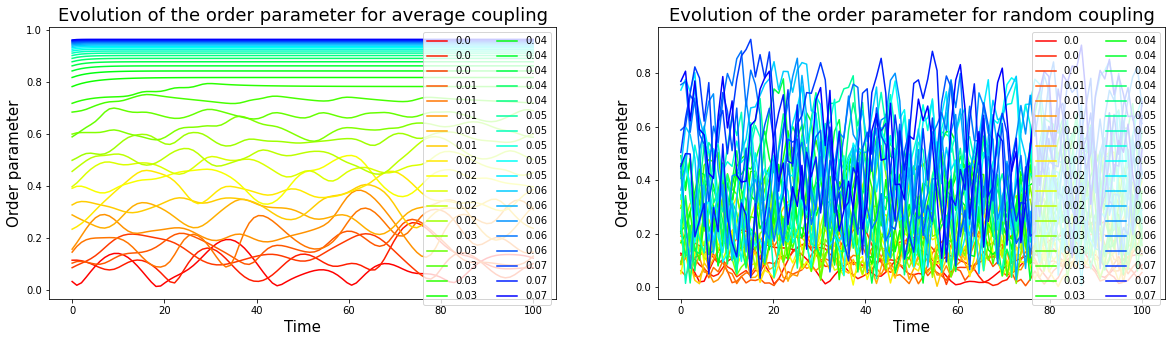

In [4]:
plt.subplots(figsize=(20, 5))
plt.subplot(1, 2, 1)
plot_r_values("average")
plt.subplot(1, 2, 2)
plot_r_values("random")

As we can see, the system coupled by average internal phase experiences pretty fast syncronization, almost too fast to bee seen on the graph (hum! suspicious... something might be wrong?). For the systems that reach complete syncronization, that happens after only 2 to 3 oscilations, while the ones that reach partial sync take a bit more to reach their maximum r, with that r being clearly dependent on K (as one can see with the gradient)
It should also be noted that the values of K tested (between 0 and 0.07) are quite, quite low, so we can say this system is **highly sensible to coupling**. Looking at the legends, the transition to partial syncronization (total syncronization is more difficult to study as previously explained) seems to occur after about 5 repetitions for k = 0.04; or after 15 rounds for k = 0.02

The system coupled using a random distribution, however, never reaches a point where it becames stable; and this makes sense! By applying a random external force in each oscilation, we are just "driving the system crazy", making it impossible for it to reach a steady state. Thus, we will try to apply a more "coherent" external force, one which will act as a "master ocilator" that helps all oscilators syncronize; in this case, this forces will be $\pi$ and $\frac{\pi}{2}$



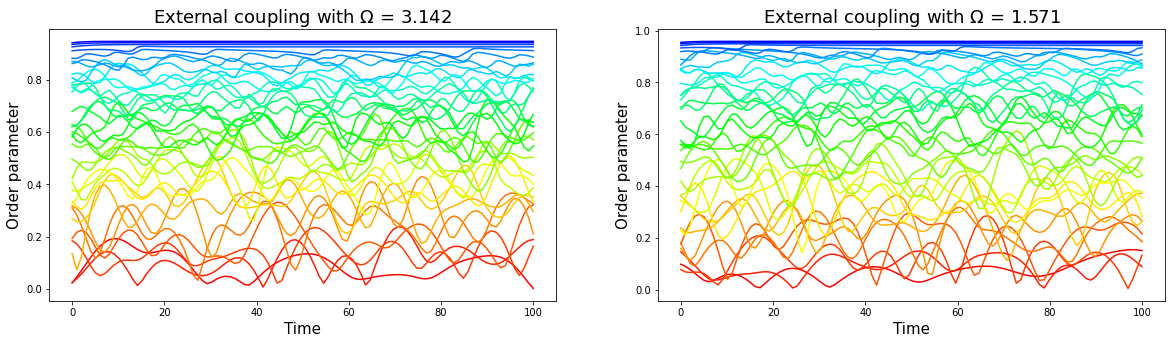

In [5]:
plt.subplots(figsize=(20, 5))
plt.subplot(1, 2, 1)
plot_r_values(np.pi, legend=False) #Already know the legend, make it clearer
plt.subplot(1, 2, 2)
plot_r_values(np.pi/2, legend=False)

As we can see, both graphs are pretty simmilar: They have some complete coupling, some partial coupling and some random noise (no coupling at all). When compared with the previous graph, we can see than, unline with external random force, coupling does appear; but, the coupling is always less intense (there is less lines in the upper part of the graph) than when using $\Psi$ as the coupling method. Thus, it can be said that **interal average phase is a better coupling method than an external forcing**
    
Once again, the color gradient clearly shows how higher k values lead to higher r values (makes sense)

Now, we would like to plot the distribution of phase differences between all pairs of oscillators for different values of K, before and after the transition. To do this, we obtain the values from get_new_theta function. We use k = 0.05, and 5 vs 20 rounds of change:

(To avoid repeating work, I will do this for Average Phase Coupling only)

First, we set the plotting function and the initial (must be common) values for plotting:

In [6]:
theta = 2*np.pi*np.random.random(100); omega = 2*np.pi*np.random.random(100)

In [7]:
def plot_phase_diffs(k, numosc):
    r, new_theta, osc = do_nsteps(theta,omega,k,0.1,numosc,"oscilators") #Get things to plot

    plt.subplots(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel('Oscilators', fontsize=15)
    plt.ylabel('Phase', fontsize=15)
    plt.title(f'Phase of oscilators for k = {k} & {numosc} oscilations', fontsize=18)
    plt.plot(new_theta,'bo')
    plt.subplot(1, 2, 2)
    plt.xlabel('Number of oscilatos', fontsize=15)
    plt.ylabel('Phase difference', fontsize=15)
    plt.title(f'Phase difference for k = {k} & {numosc} oscilations', fontsize=18)
    plt.hist(osc[-1], color="#0000ff");

And then, we plot:

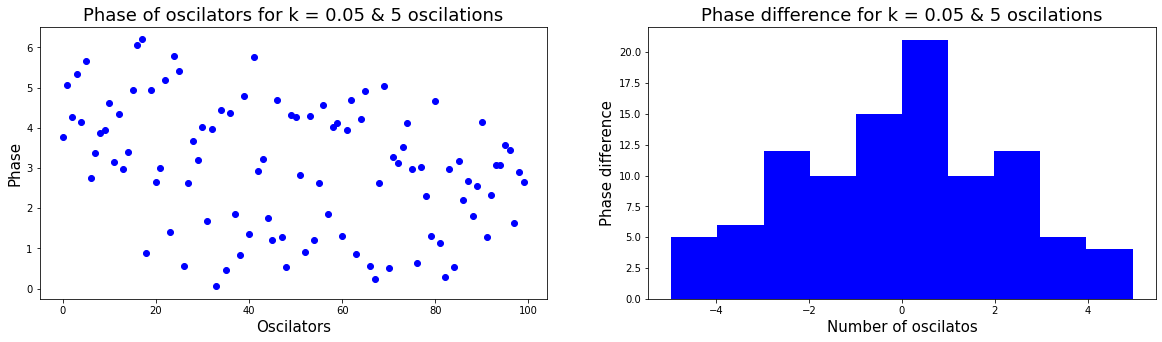

In [8]:
plot_phase_diffs(0.05, 5)

As we can see, after 5 oscilations, most oscilators stand completely separated and different. Lets see after 20:

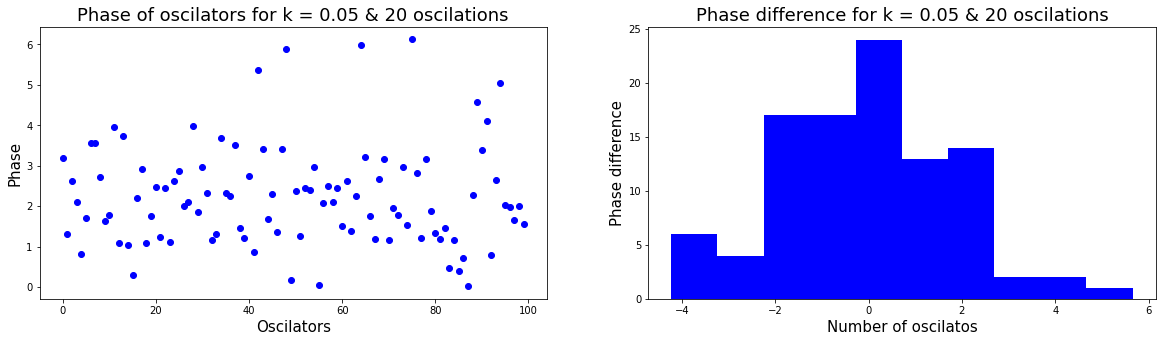

In [9]:
plot_phase_diffs(0.05, 20)

Wow! As we can see, the oscilators have converged clearly: The histogram shows a distribution much more centered than the previous one: this is also visible at the left, where oscilators now seem much more "aligned!" (its bad for me to say it, but it is definetely an amazing data visualization hum)

Finally, we would like to vary $\omega$ and $K$ to stimate where the arnold tongues are situated. Lets have a quick recap: arnold tongues are, essentially, **areas of entrainment**, that is, the regions where the oscilators tend to syncronize with each other. We can approximate arnold tongues by using the order parameter $r$, given that, the higher the r, the more syncronized; another, more accurate way of doing it would be by plotting the same heatmap but with a comparison of the oscillator frequencies $\theta$ and the external forcing $\Omega$. To do this, we can define the following plotting function:

In [10]:
theta = 2*np.pi*np.random.random(100); omega = 2*np.pi*np.random.random(100) #Reset initial values

In [11]:
def plot_heatmap(mymethod):
    my_omegas = np.linspace(0, 4*np.pi, 25); my_ks = np.linspace(0,0.07,36)
    omega_axis = np.around(my_omegas, 2); k_axis = np.around(my_ks, 2)
    r_matrix = pd.DataFrame(index=my_ks, columns=my_omegas)
    for omega in my_omegas:
        for k in np.linspace(0,0.07,36):
            r, new_theta, osc = do_nsteps(theta,omega,k,0.1,10,mymethod) 
            r_matrix.at[k,omega] = round(r[-1], 4) #Append r after n oscillations (n-1 actually)
    sns.heatmap(r_matrix.to_numpy().tolist(), 
                cmap = "viridis", xticklabels = omega_axis, yticklabels = k_axis)
    if isinstance(mymethod, float):
        plt.title(f'Heatmap of $r$ with $\Omega$ = {round(mymethod, 2)}', fontsize=18) 
    else:
        plt.title(f'Heatmap of $r$ with {mymethod} coupling', fontsize=18)
    plt.xlabel('External forcing $\omega$', fontsize=15)
    plt.ylabel('Coupling coefficient $k$', fontsize=15)

And plot it:

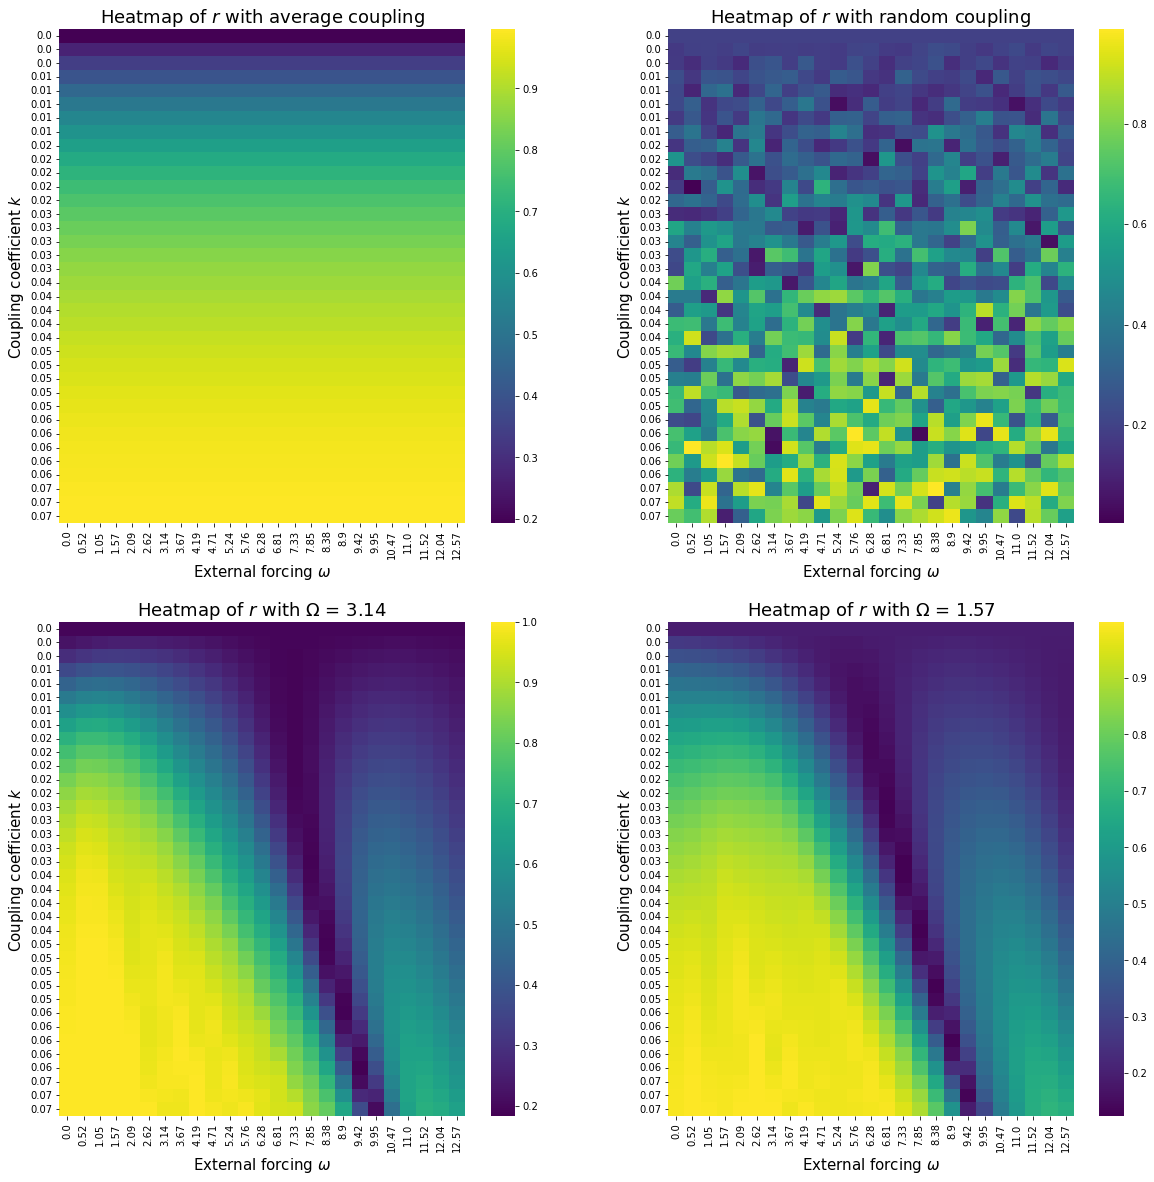

In [12]:
plt.subplots(figsize=(20, 20))
plt.subplot(2, 2, 1)
plot_heatmap("average")
plt.subplot(2, 2, 2)
plot_heatmap("random")
plt.subplot(2, 2, 3)
plot_heatmap(np.pi)
plt.subplot(2, 2, 4)
plot_heatmap(np.pi/2)

In the 4 graphs plotted above, we can see the following:

* The average-phase coupled map presents arnold tongues for all k < 0.03 (approximately). Of course, $\omega$ does nothing here: this map is not coupled by external force, but just by average phase!!
* The randomly-coupled map has a completely random, pixelated behaviour: we cannot find **any** arnold tongues (or any pattern really)
* For both of the externally coupled maps, arnold tongues are found, and in a pretty simmilar way: the higher the k, the more likely the oscilators will be coupled. However, with regards to omega, there seems to be a treshold around $2 \cdot \pi$, after which no coupling is found; in fact, there seems to be a point of "maximum disorder" around $3 \cdot \pi$, after which syncronization seems to get a bit better, probably doe to random syncronizations (noise)

And, ¡that would mostly be it! As a bonus, if you wish, there is a way to plot a dynamic phase map, ¡just as in [Ride my Kuramotorcicle](https://www.complexity-explorables.org/slides/ride-my-kuramotocycle/)! using the same code from [Rochester University](astro.pas.rochester.edu/~aquillen/phy256/problems/ps5+sol.html). Please, refer to their course for full details.

As a closing note, one way to improve the code in this Jupyter Notebook would be to rename the ```theta``` and ```omega``` vectors, which currently have to be updated anytime a function is called, to avoid conflict; however, I didnt have enough time for that :(